In [147]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import qexpy as q
import qexpy.plotting as qplt
import pandas as pd

In [170]:
def malus(x,a,b):
    return a* q.cos(x*b)**2
def cos2(x):
    return q.cos(x)**2



def int_promedio(Matriz,radio):
    if radio==0:
        return Matriz
    else:
        a,b = np.shape(Matriz)
        Int_prom= np.zeros((a-2*radio,b-2*radio))
        for i in range(a-2*radio):
            for j in range(b-2*radio):
                Aux = Matriz[i:i+2*radio, j:j+2*radio]
                prom = Aux.mean()
                Int_prom[i,j]=int(prom)
        return Int_prom

def Intensidad_puntos(Matriz_recortada,lista_numeros, N_x,N_y):
    n = len(lista_numeros)
    Intensidades_puntuales = []
    I_auxiliares=[]
    I_de_promedios = []
    for indice in lista_numeros:
        Intensidades_puntuales.append([])
        I_auxiliares.append([])
        I_de_promedios.append([])
    
    for i in range(37):
        #matriz de promedios
        I_de_promedios = [int_promedio(Matriz_recortada[i],ii) for ii in lista_numeros]
        I_auxiliares = [np.zeros((N_y,N_x),int) for ii in lista_numeros]
        for j in range(N_x): 
            for k in range (N_y):
                a,b = np.shape(Matriz_recortada[i])
                x = int((b)/(2*N_x)*(2*j+1))
                y = int((a)/(2*N_y)*(2*k+1))
                for jj in range(n):
                    I_auxiliares[jj][k,j] = I_de_promedios[jj][y,x]
        for jj in range(n):
                Intensidades_puntuales[jj].append(I_auxiliares[jj])
    return Intensidades_puntuales

def plot_malus(Intensity, Nx,Ny, index,lista):
    theta = q.MeasurementArray( [np.radians(i*10) for i in range(37)],name= "angle")
    for i in range(Ny):
        for j in range(Nx):
            I_0_2 = Intensity[index][0][i,j]
            intensity_exp = q.MeasurementArray([Intensity[index][k][i,j]/I_0_2 for k in range(37)],name = "intensity")
            fig = qplt.plot(theta, intensity_exp,"--",label = "Datos Experimentales")
            result = q.fit(theta, intensity_exp, model = malus,parguess =[1,1])
            fig.plot(cos2,'--',label = 'Ley de Malus')
            title = 'Intensidad normalizada para el punto ('+str(i+1)+" "+str(j+1)+") con radio="+ str(lista[index])
        
            fig.title = title
            fig.legend()
            fig.plot(result)
            print(result)
            fig.show()
def plot_malus_promedio(Intensity, Nx,Ny, index,lista):
    theta = q.MeasurementArray( [np.radians(i*10) for i in range(37)],name= "angle")
    I_0_2_mean = np.mean(Intensity[index][0])
    intensity_exp = q.MeasurementArray([np.mean(Intensity[index][k])/I_0_2_mean for k in range(37)],name = "intensity")
    fig = qplt.plot(theta, intensity_exp,"--",label = "Datos Experimentales")
    result = q.fit(theta, intensity_exp, model = malus,parguess =[1,1])
    fig.plot(cos2,'--',label = 'Ley de Malus')
    title = 'Intensidad normalizada media para radio = '+ str(lista[index])
    fig.title = title
    fig.legend()
    fig.plot(result)
    print(result)
    fig.show()


def plot_malus_promedio_polar(Intensity, Nx,Ny, index,lista):
    theta =  [np.radians(i*10) for i in range(37)]
    I_0_2_mean = np.mean(Intensity[index][0])
    intensity_exp = [np.mean(Intensity[index][k])/I_0_2_mean for k in range(37)]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, intensity_exp,label = "Datos Experimentales")
    
    plt.plot(theta, np.cos(theta)**2,'--',label = 'Ley de Malus')
    title = 'Intensidad normalizada media para radio = '+ str(lista[index])
    ax.set_title(title)
    plt.legend()
    plt.show()
    
def plot_malus_color(matriz):
    a,b = np.shape(matriz)
    theta = q.MeasurementArray( [np.radians(i*10) for i in range(37)],name= "angle")
    I_0 = matriz[-1,:]
    intensity_exp = q.MeasurementArray([matriz[:,i]/I_0_2[i] for i in range(b)],name = "intensity")


In [101]:
Flags = [cv2.IMREAD_COLOR, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_UNCHANGED ]

flag = Flags[1]

I_XY = []
for i in range(37):
    filename = str('Images_ImageAnalysis/w')+str(i+1)+str('.jpg')
    I_XY.append(cv2.imread(filename, flag))  

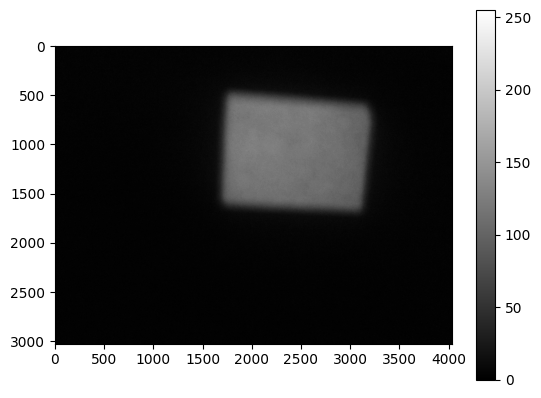

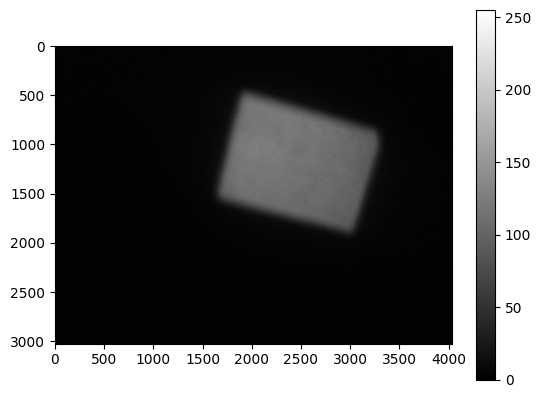

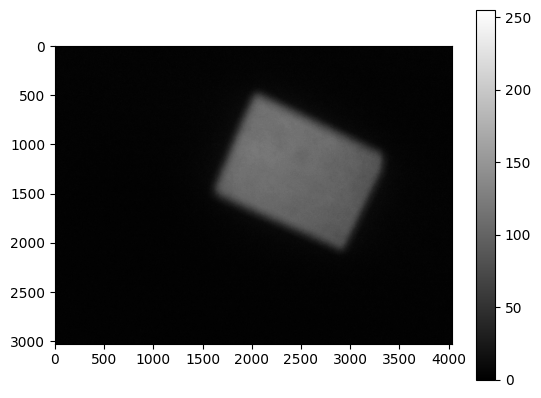

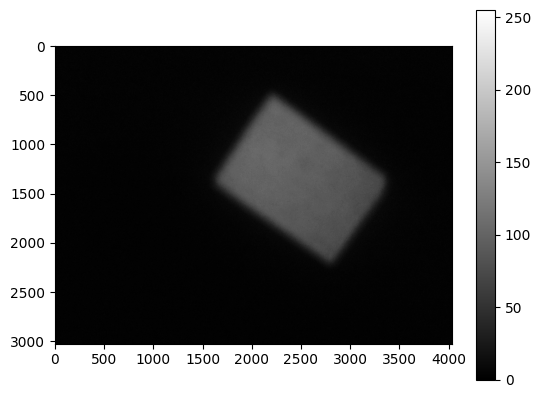

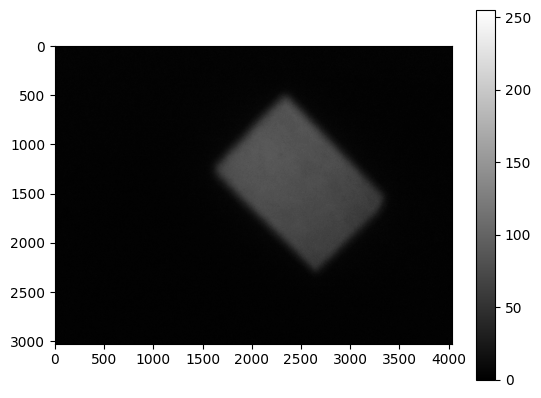

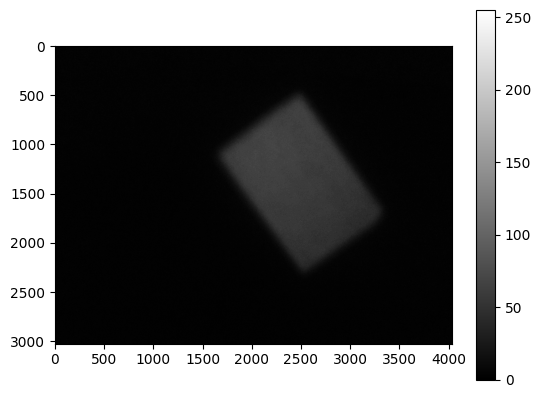

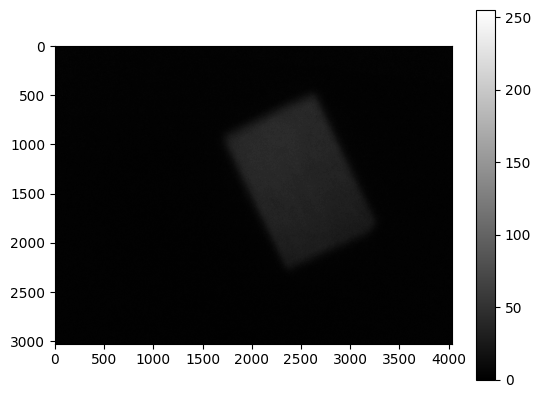

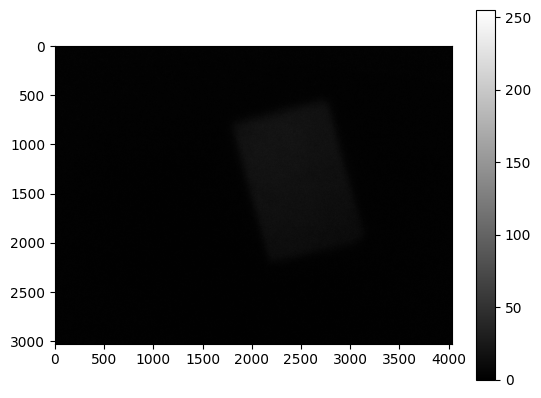

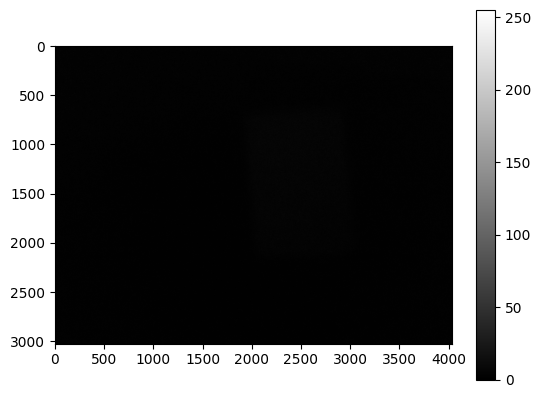

In [32]:
for j in range(9):
    plt.imshow(I_XY[j], cmap='gray', vmin=0, vmax=255)
    plt.colorbar()
    plt.show()

In [33]:
#recortar región de la imagen
#pixeles de inicio en la esquina superior izquierda en y vs x
Y_sup,X_sup = 1000 , 2200
#píxeles de final en la esquina derecha inferior
Y_inf,X_inf = 1200, 2300

I_XY_recortado=[I_XY[i][Y_sup:Y_inf,X_sup:X_inf] for i in range(len(I_XY))]


100 200


In [121]:

#16 puntos para verificar ley de malus
Nx, Ny = 2,8
lista_radios = [0,1,2,3]
Intensity = Intensidad_puntos(I_XY_recortado,lista_radios,Nx,Ny)



----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.92 +/- 0.02,
b = 1.002 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.188]
 [-0.188  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


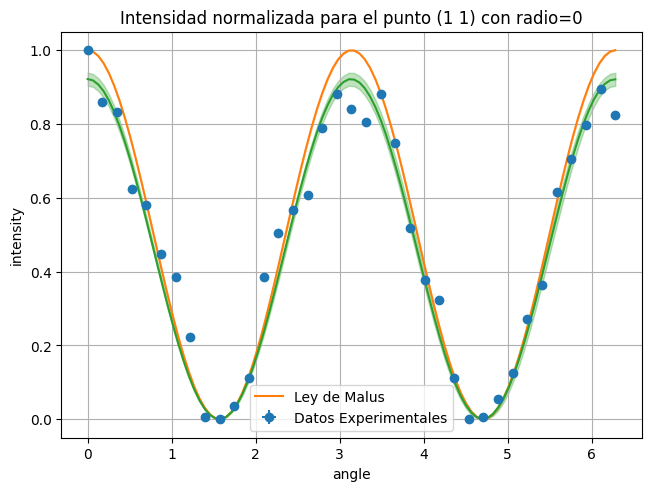

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.95 +/- 0.02,
b = 1.003 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


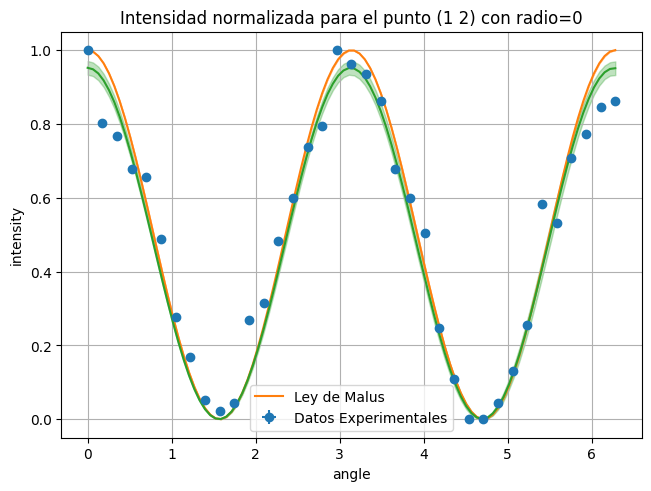

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.99 +/- 0.02,
b = 1.008 +/- 0.006

Correlation Matrix: 
[[ 1.    -0.181]
 [-0.181  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


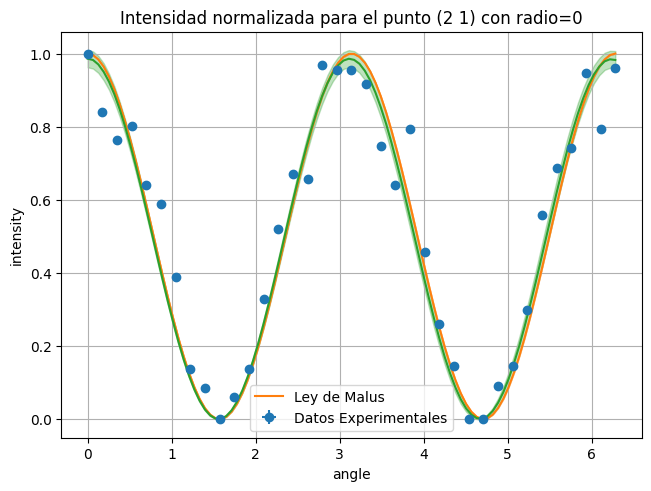

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.98 +/- 0.03,
b = 0.992 +/- 0.008

Correlation Matrix: 
[[ 1.    -0.196]
 [-0.196  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


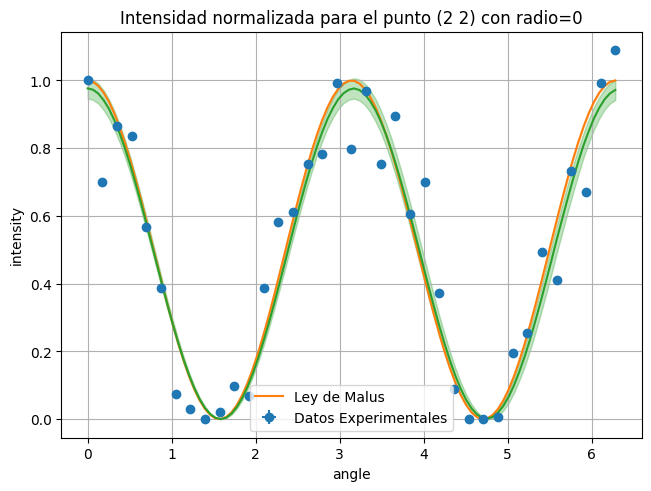

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.96 +/- 0.02,
b = 1.006 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.183]
 [-0.183  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


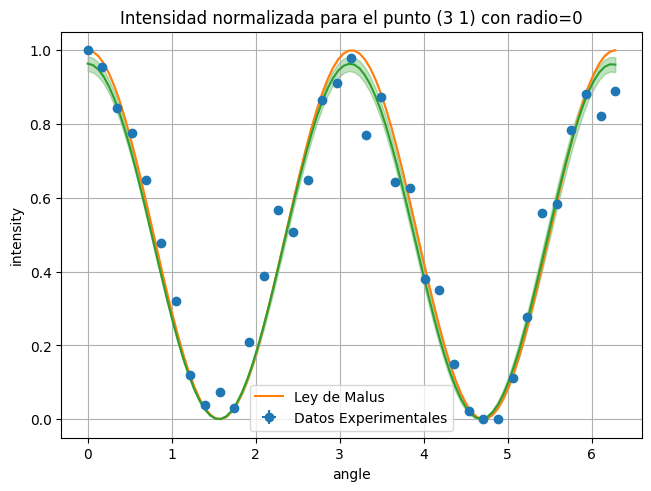

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.12 +/- 0.02,
b = 1.002 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.188]
 [-0.188  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


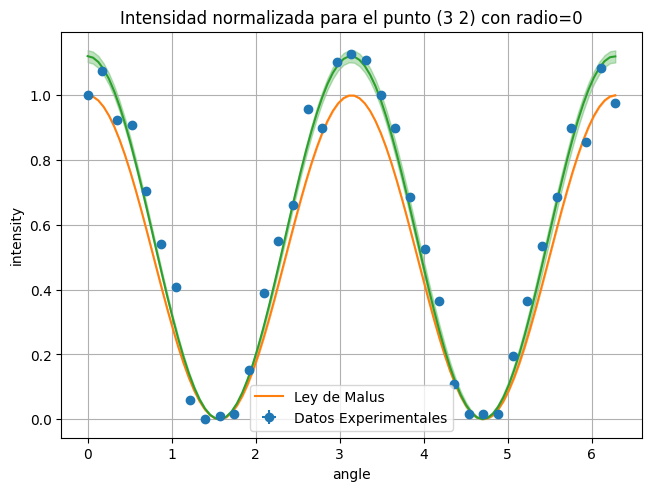

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.01 +/- 0.02,
b = 1.004 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


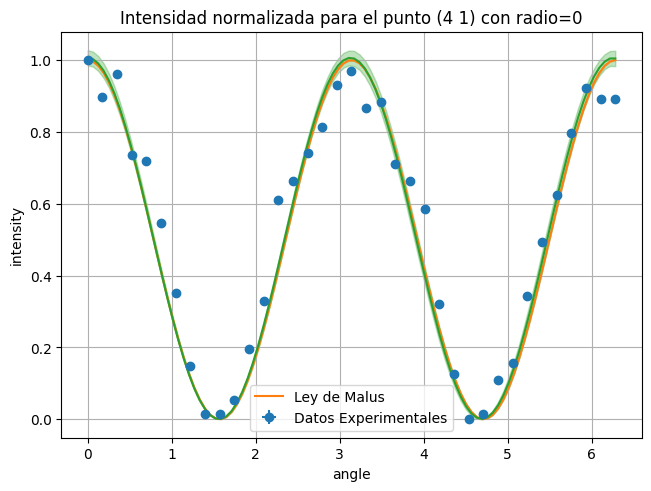

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


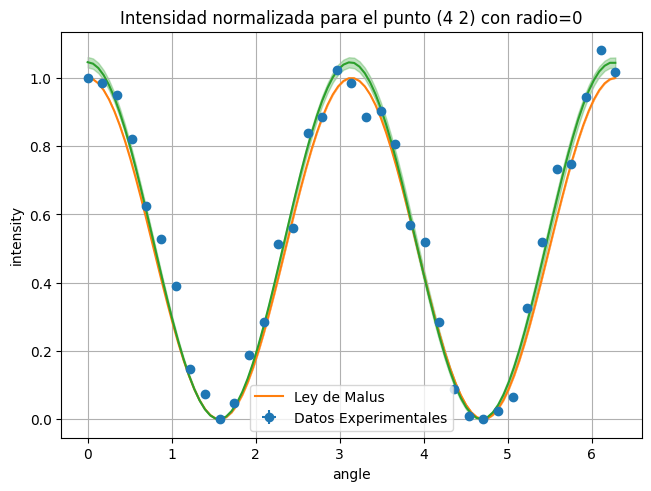

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.90 +/- 0.02,
b = 1.004 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


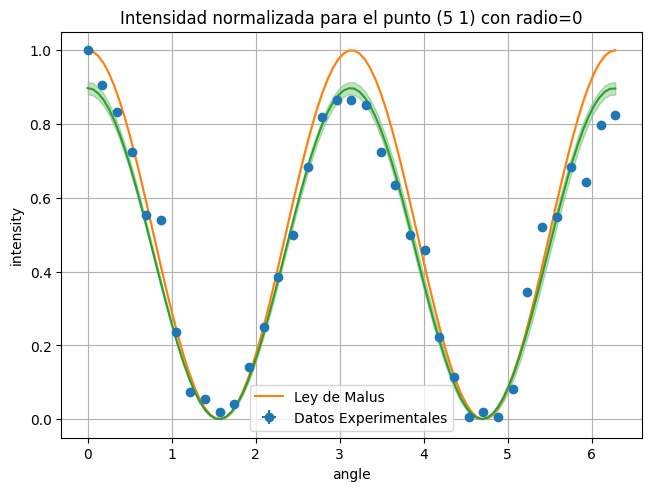

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.13 +/- 0.03,
b = 1.007 +/- 0.006

Correlation Matrix: 
[[ 1.    -0.182]
 [-0.182  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


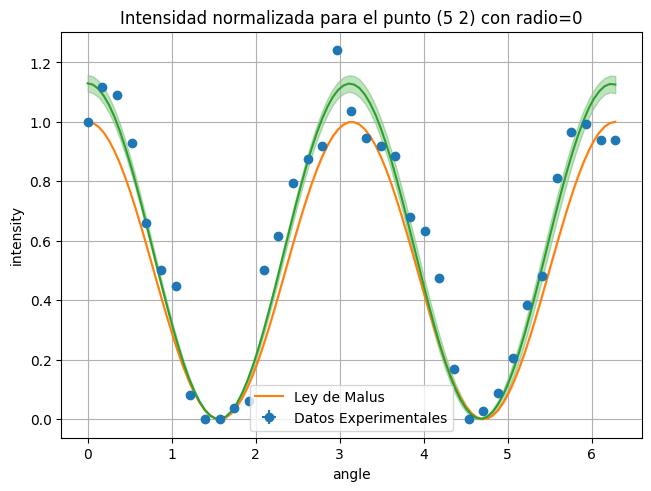

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.12 +/- 0.02,
b = 0.997 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.193]
 [-0.193  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


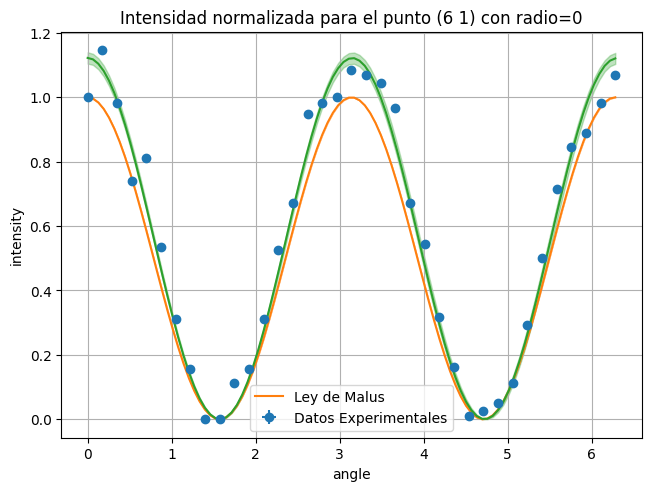

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.95 +/- 0.02,
b = 1.002 +/- 0.006

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


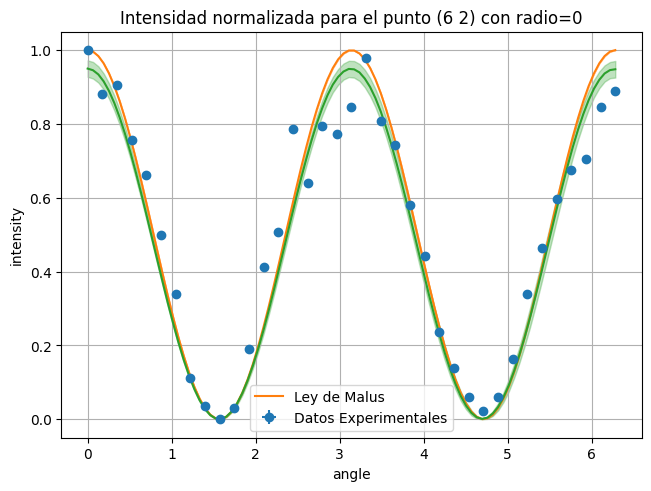

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.18 +/- 0.03,
b = 1.002 +/- 0.006

Correlation Matrix: 
[[ 1.    -0.188]
 [-0.188  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


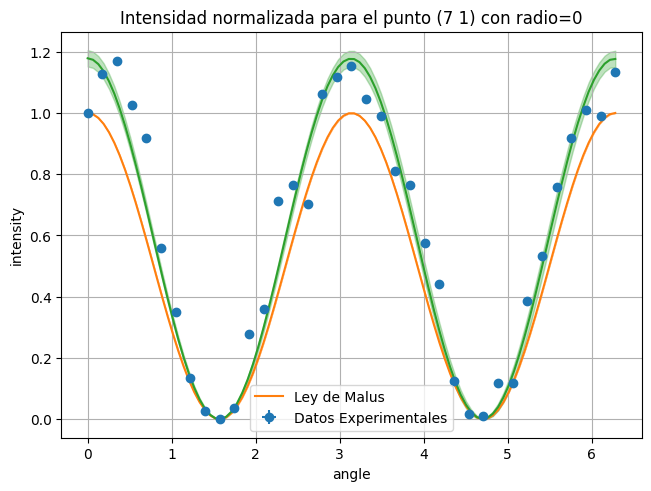

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 0.998 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.191]
 [-0.191  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


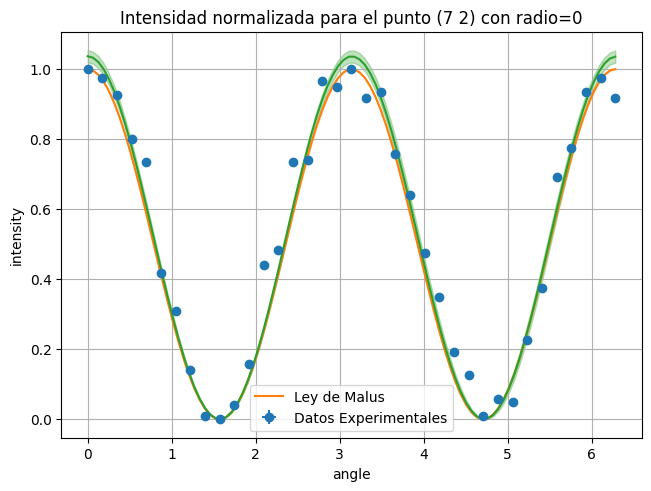

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.012 +/- 0.006

Correlation Matrix: 
[[ 1.    -0.174]
 [-0.174  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


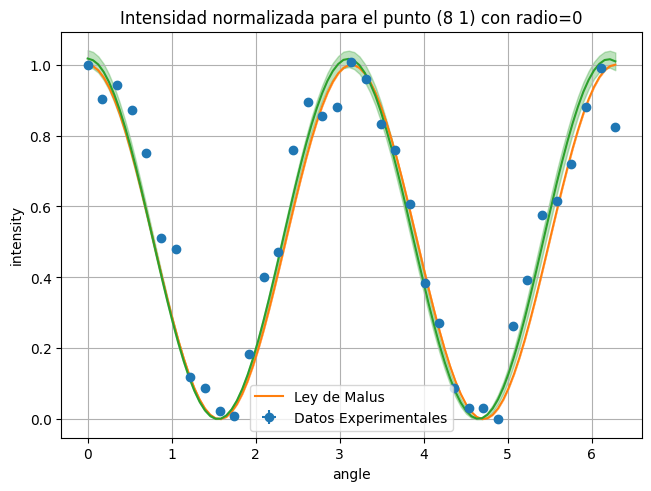

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 1.009 +/- 0.006

Correlation Matrix: 
[[ 1.   -0.18]
 [-0.18  1.  ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


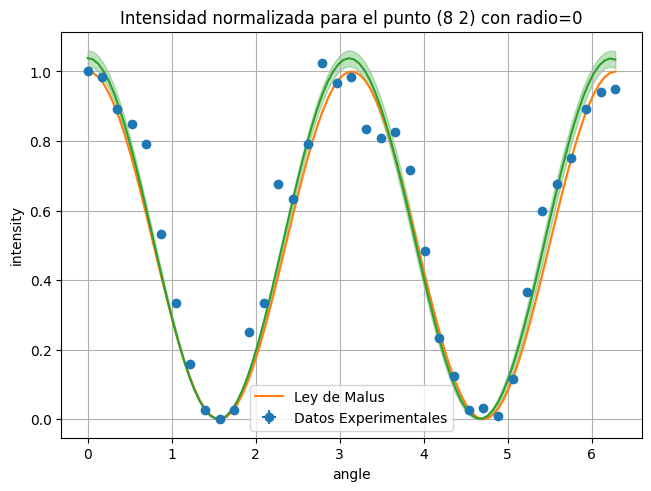

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.97 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


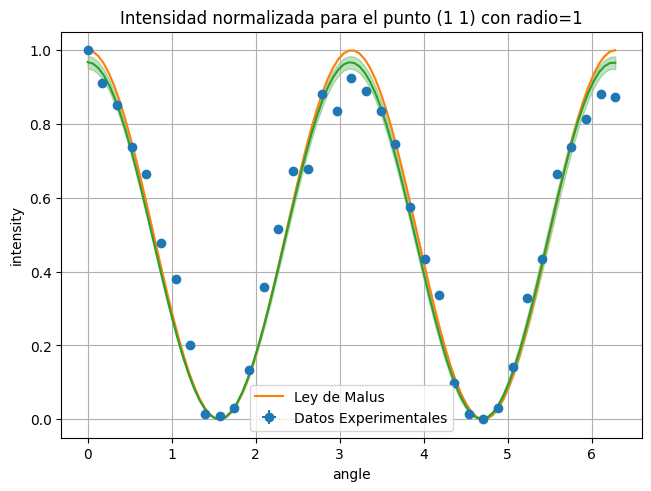

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.96 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


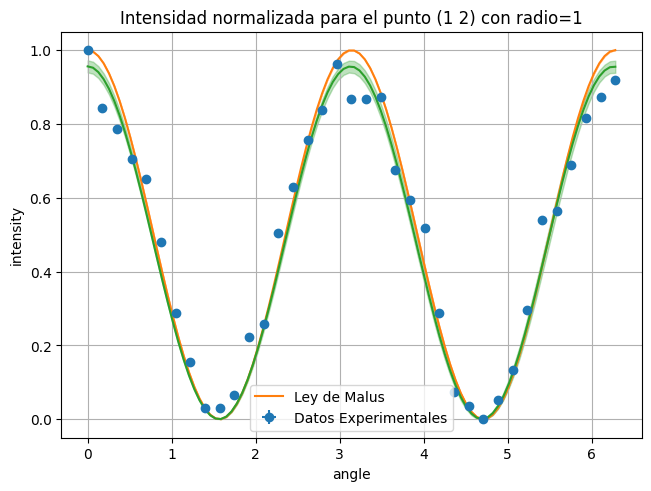

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.97 +/- 0.02,
b = 1.007 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.182]
 [-0.182  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


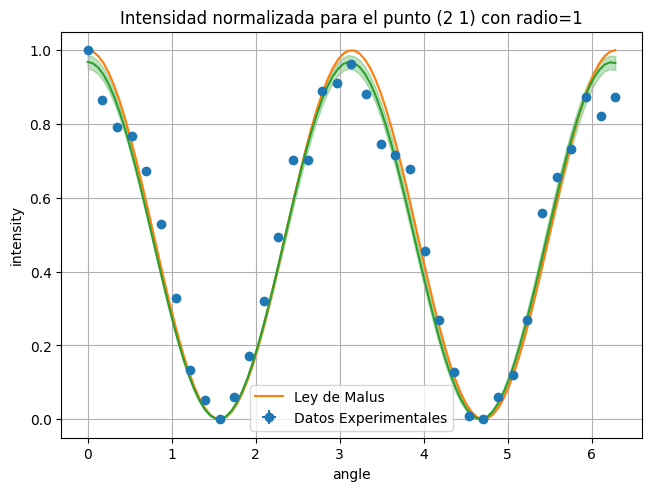

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.99 +/- 0.02,
b = 1.001 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.189]
 [-0.189  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


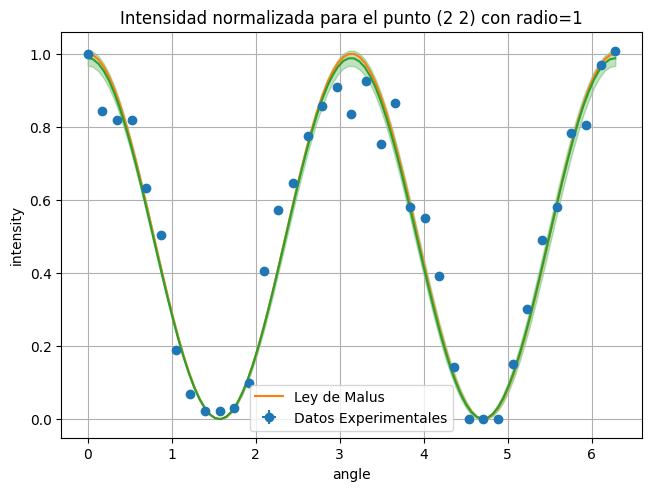

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.97 +/- 0.02,
b = 1.005 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


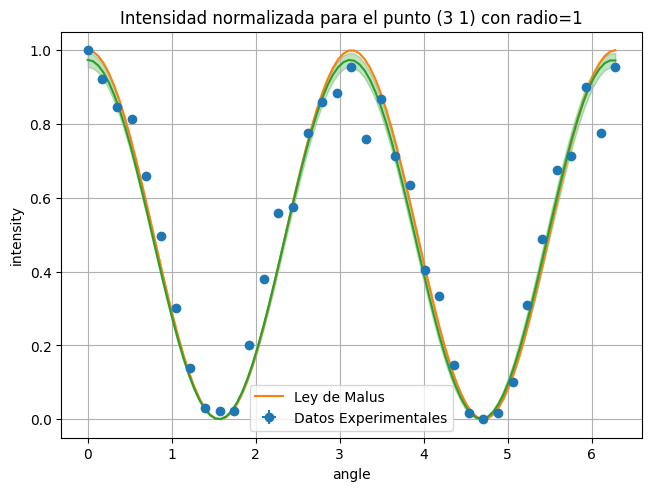

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.03 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


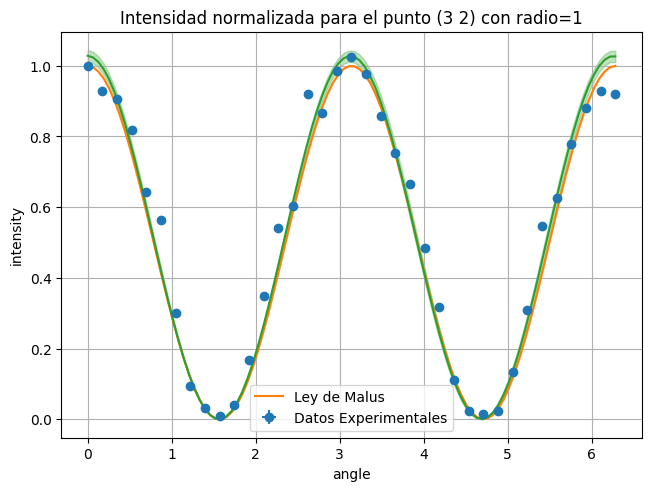

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.08 +/- 0.02,
b = 1.004 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


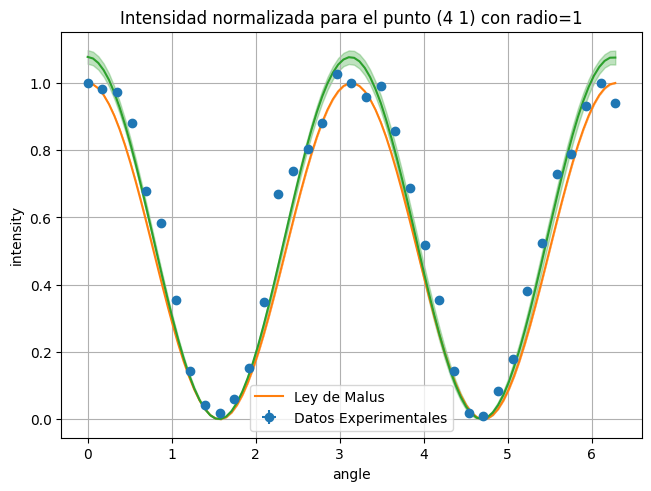

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.07 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.183]
 [-0.183  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


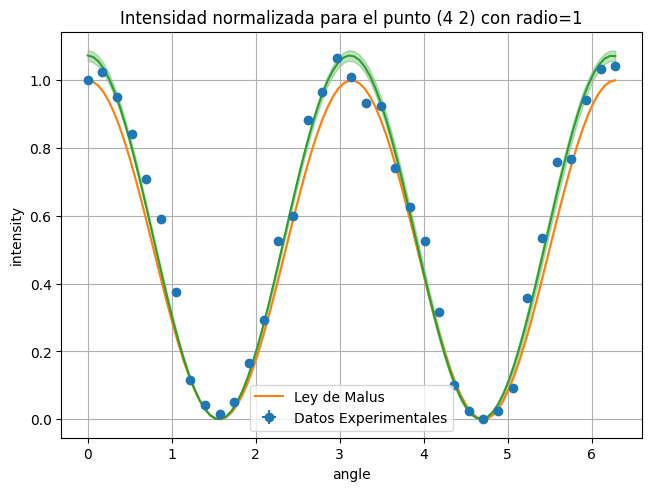

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.99 +/- 0.02,
b = 1.000 +/- 0.004

Correlation Matrix: 
[[ 1.   -0.19]
 [-0.19  1.  ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


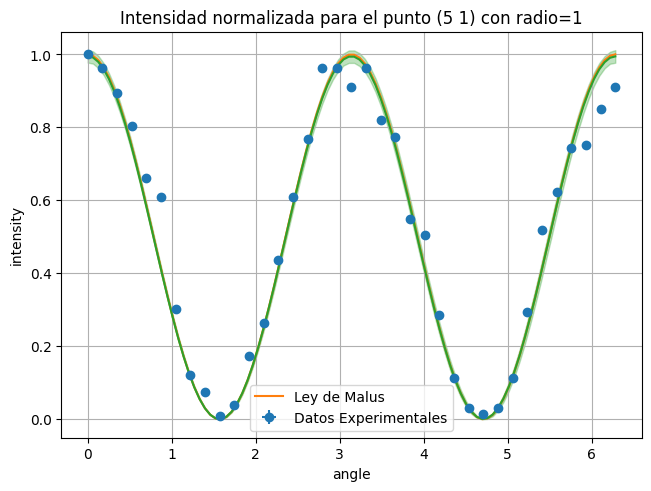

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.12 +/- 0.02,
b = 1.005 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


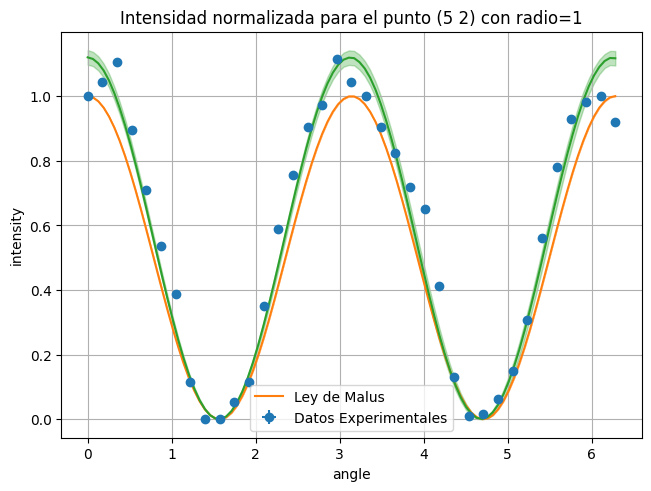

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 0.998 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.191]
 [-0.191  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


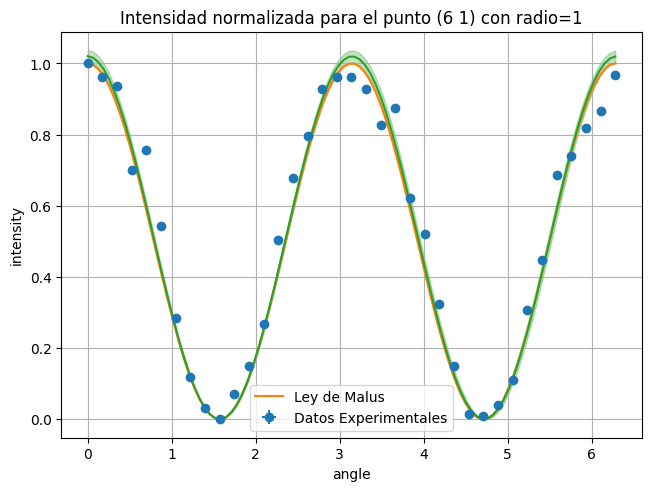

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.96 +/- 0.02,
b = 1.003 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


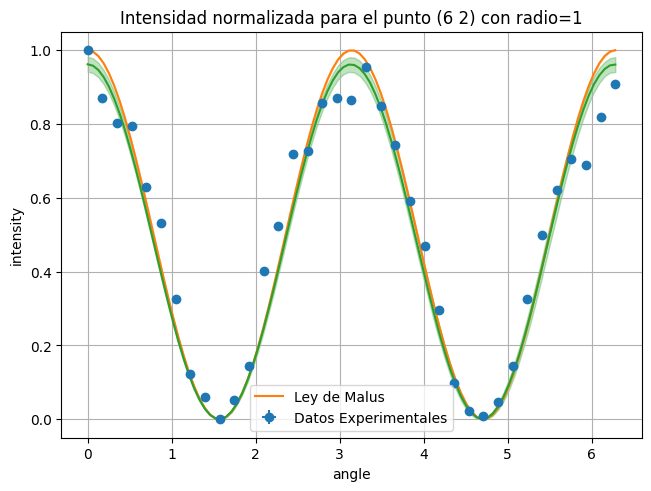

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.10 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


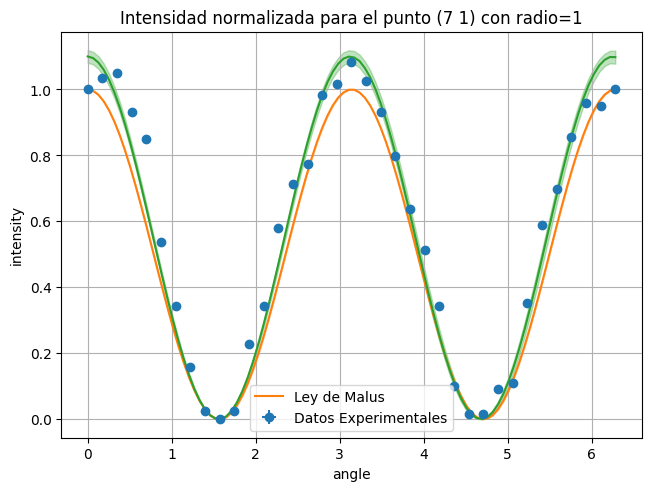

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.00 +/- 0.01,
b = 1.001 +/- 0.003

Correlation Matrix: 
[[ 1.    -0.188]
 [-0.188  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


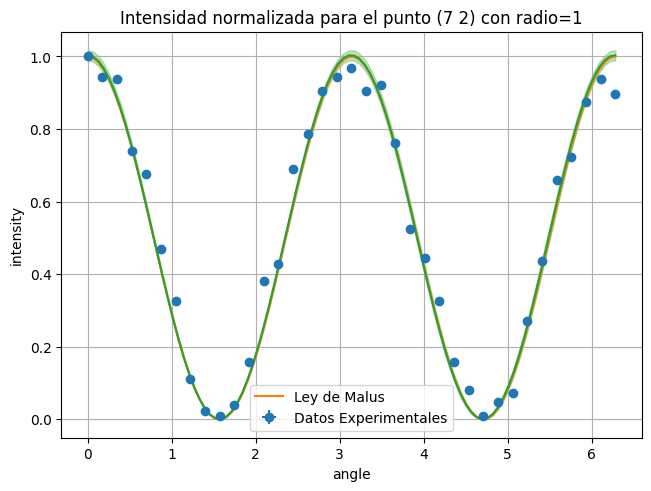

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.99 +/- 0.02,
b = 1.004 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


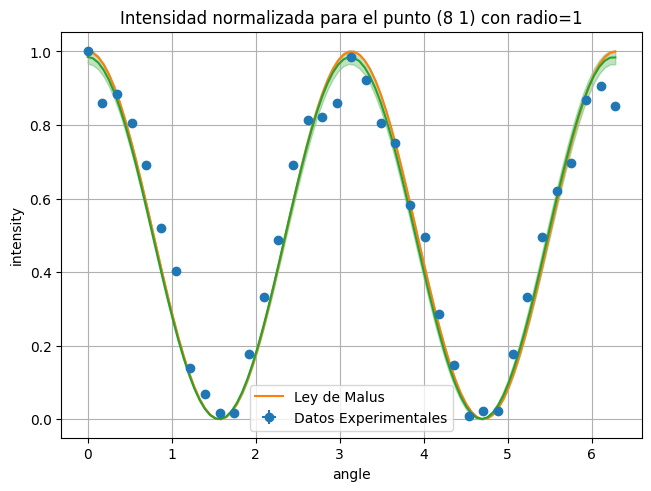

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.010 +/- 0.005

Correlation Matrix: 
[[ 1.    -0.178]
 [-0.178  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


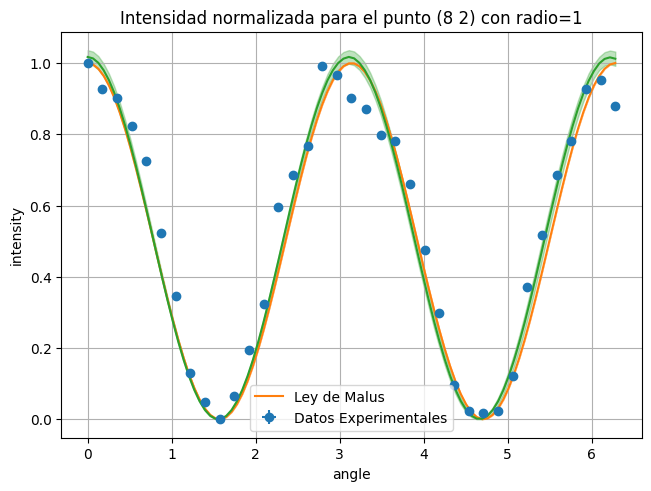

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


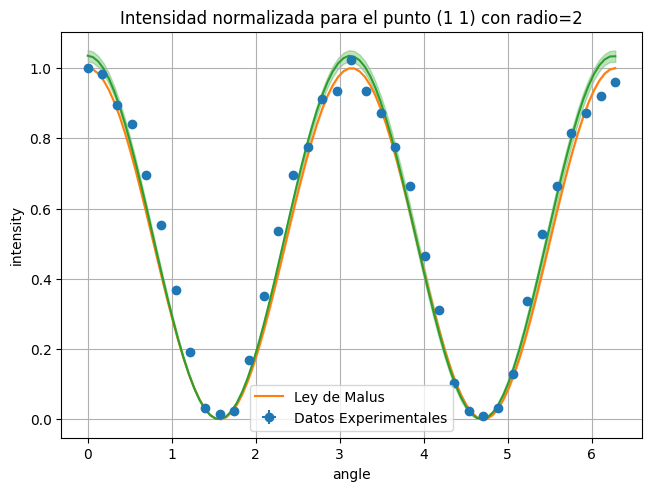

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.00 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


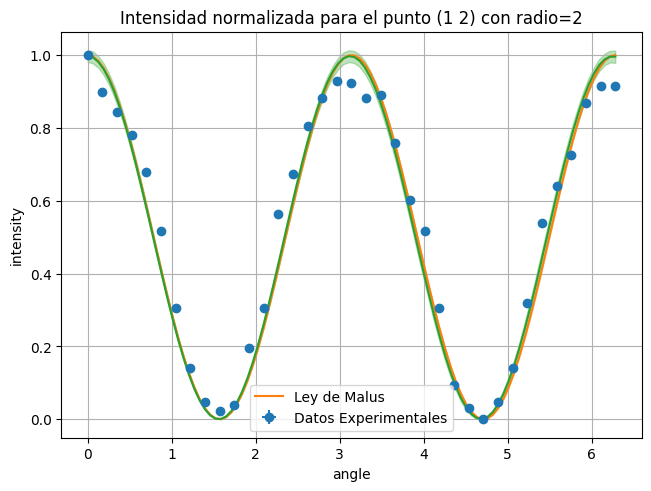

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 0.98 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


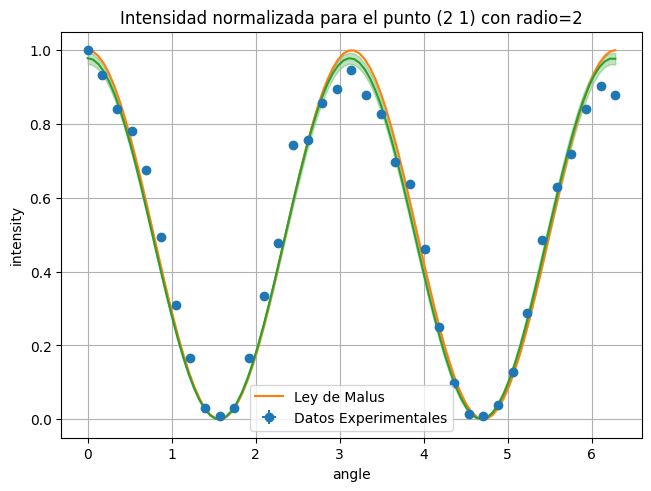

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


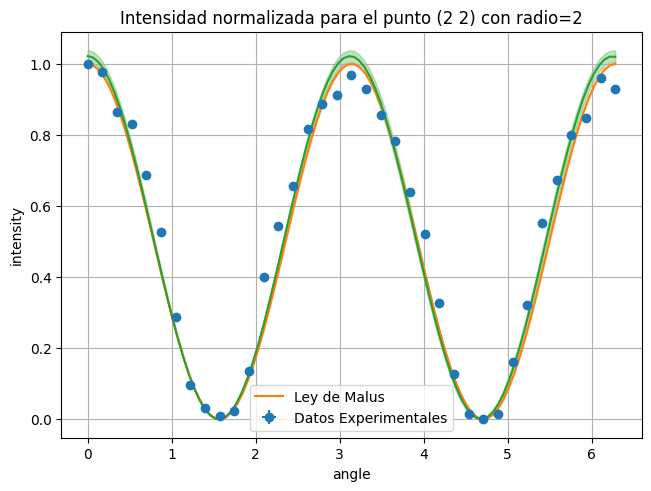

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.03 +/- 0.02,
b = 1.007 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.181]
 [-0.181  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


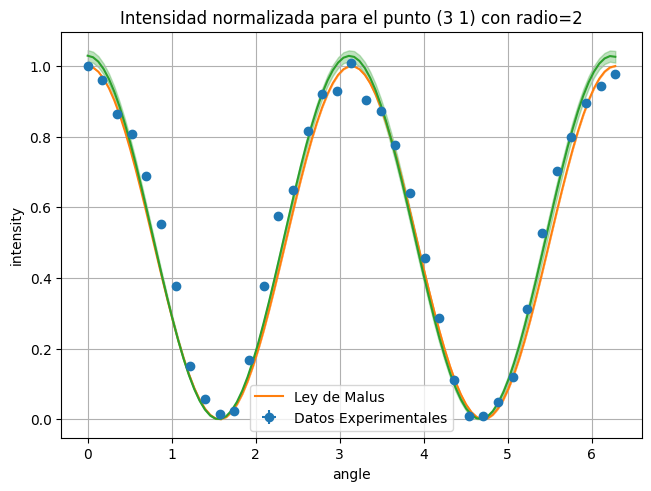

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.01,
b = 1.003 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


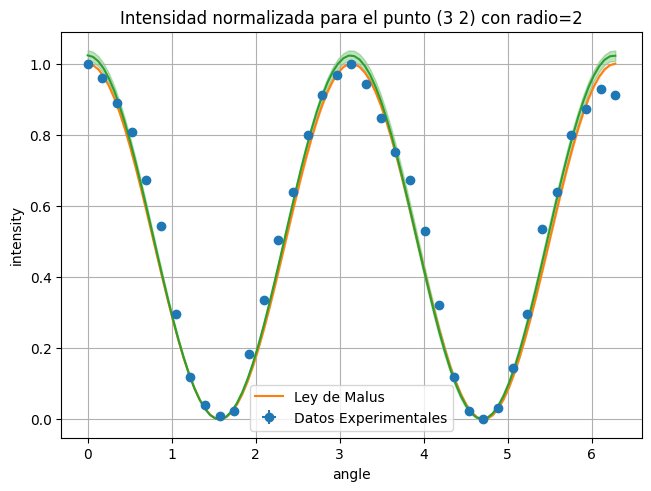

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


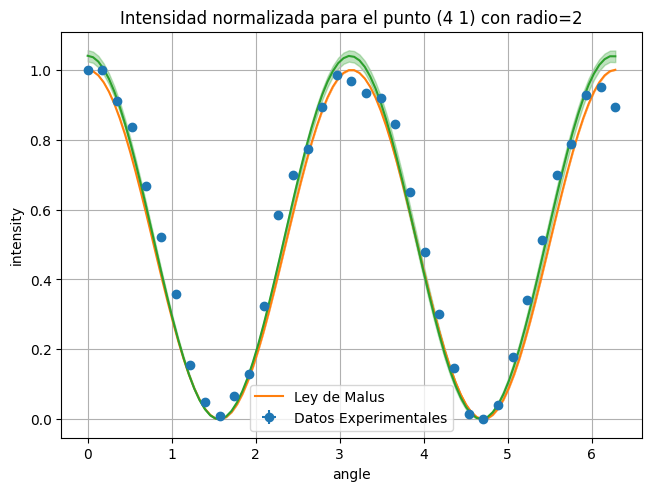

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.06 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.183]
 [-0.183  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


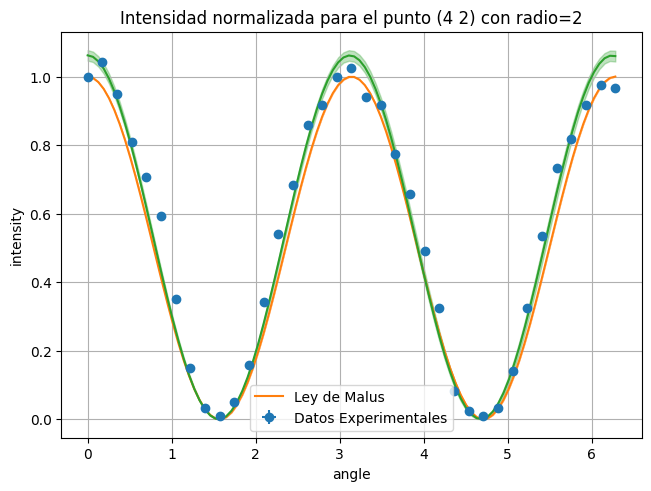

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.12 +/- 0.02,
b = 1.001 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.189]
 [-0.189  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


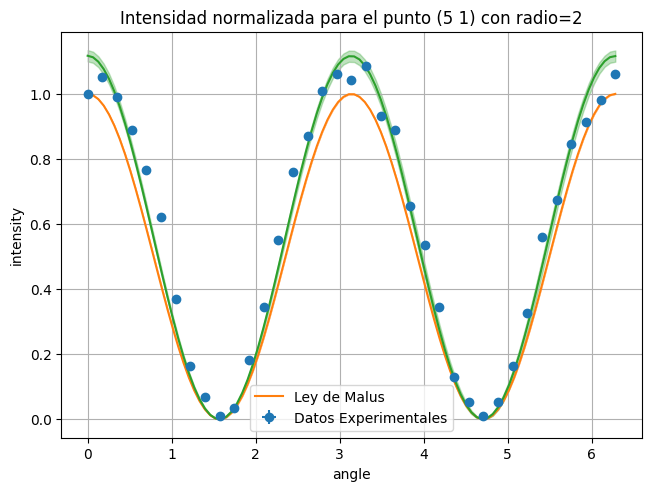

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


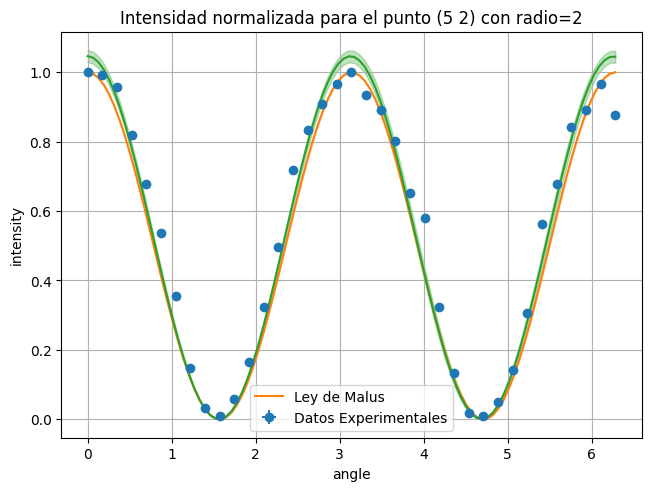

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.03 +/- 0.02,
b = 1.003 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


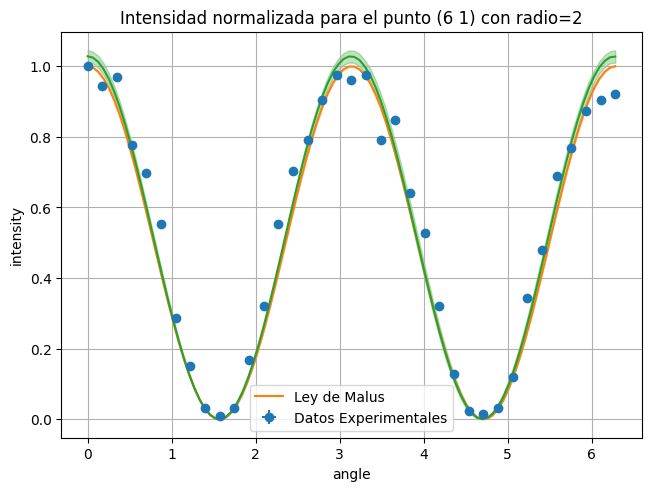

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.03 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


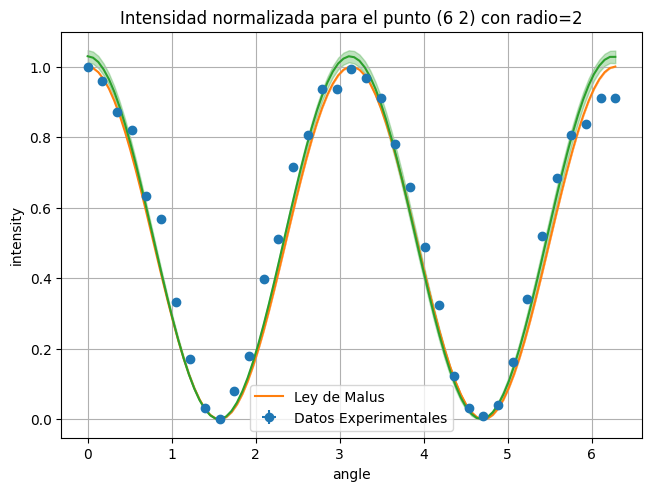

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.07 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.183]
 [-0.183  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


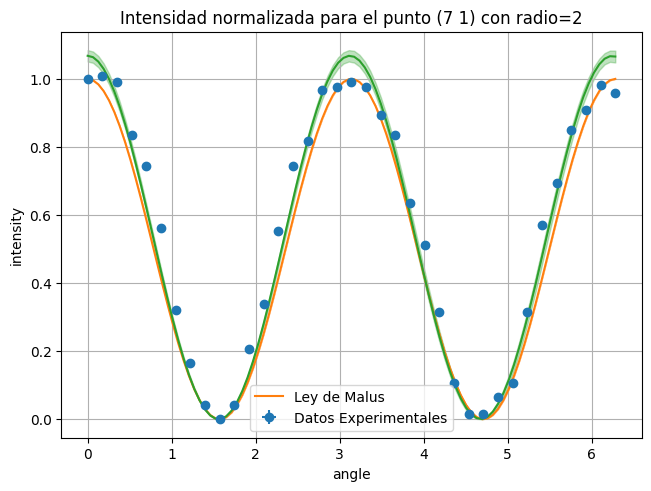

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.06 +/- 0.01,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


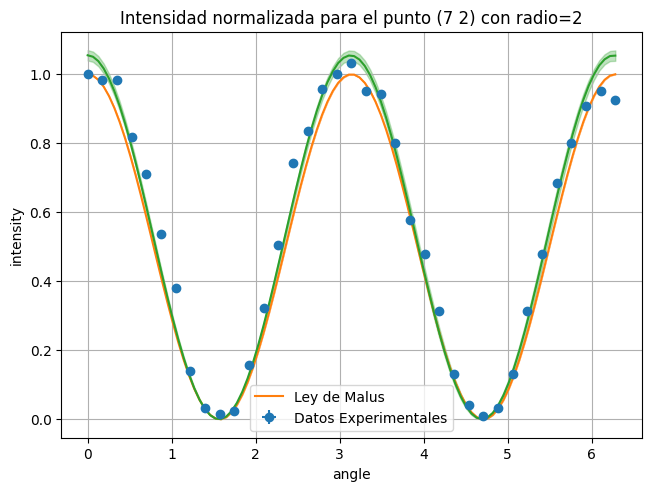

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


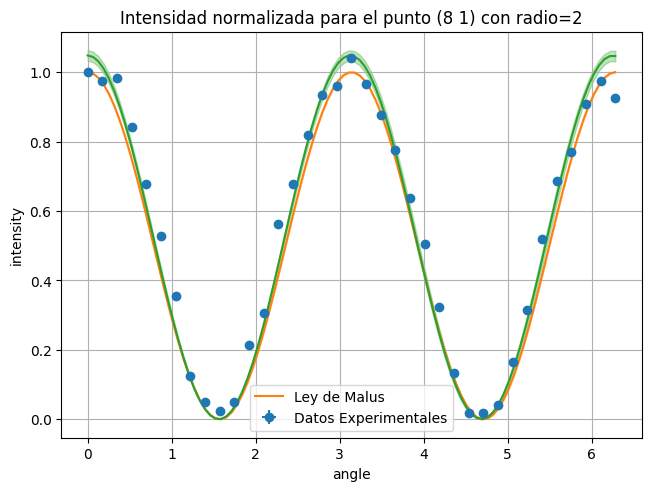

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 1.008 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.181]
 [-0.181  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


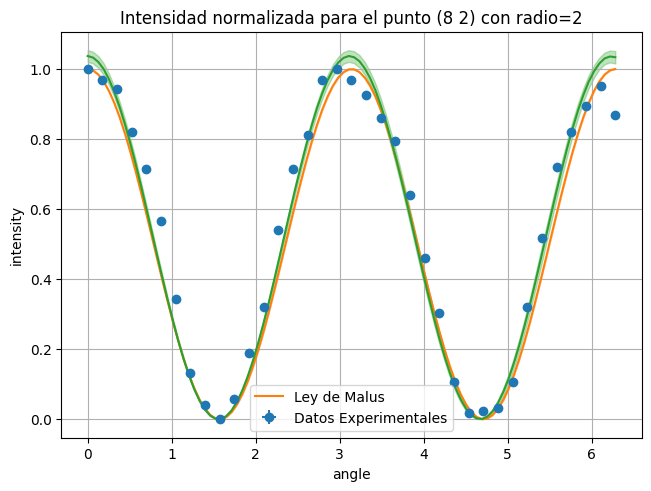

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.03 +/- 0.01,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


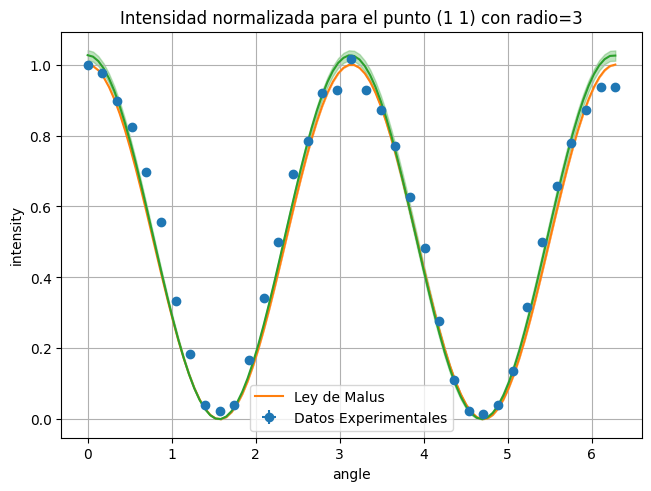

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.183]
 [-0.183  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


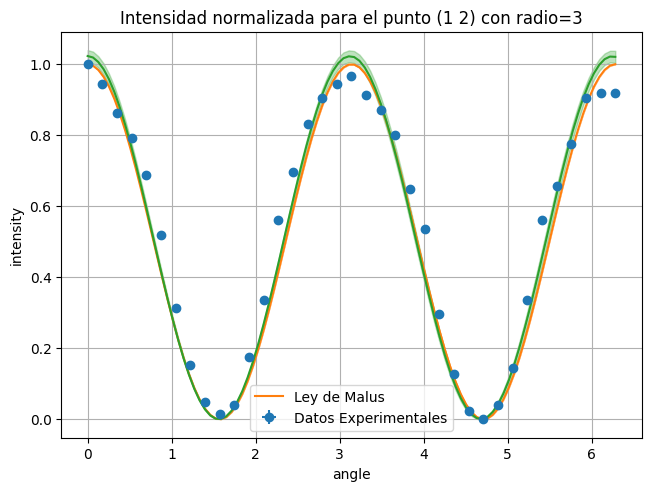

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


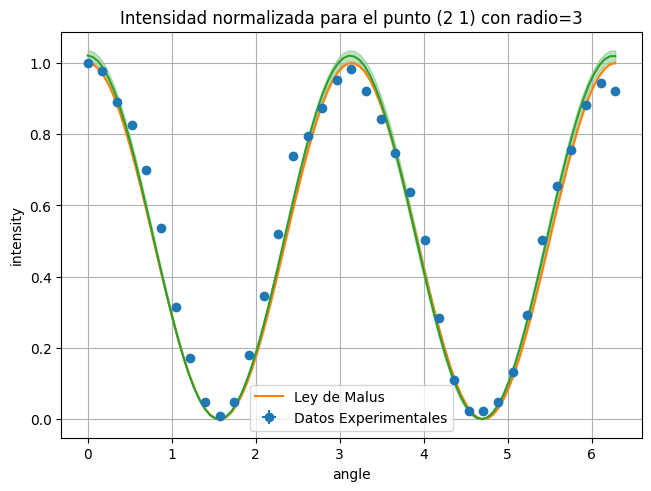

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


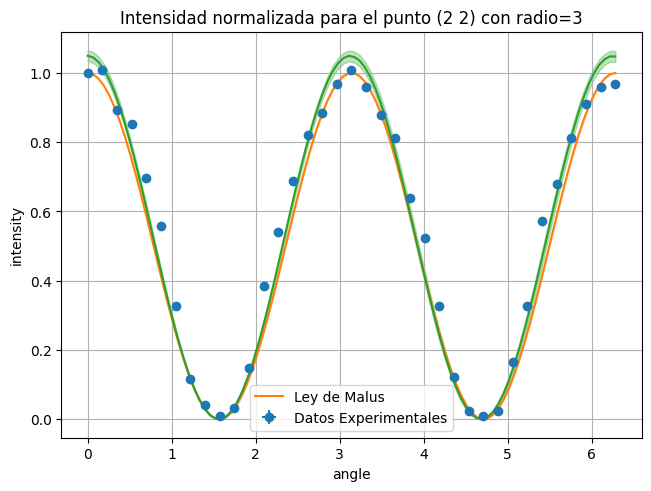

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.01,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


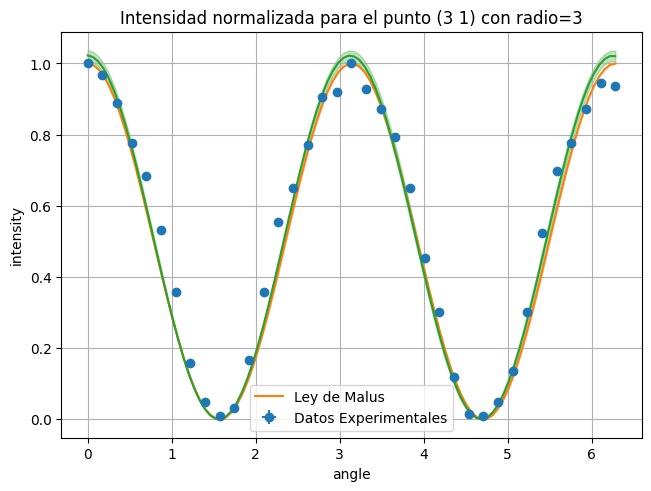

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.01 +/- 0.01,
b = 1.005 +/- 0.003

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


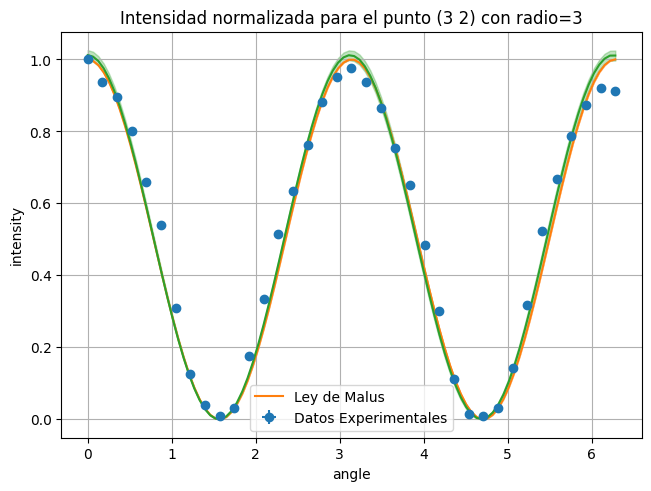

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.006 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


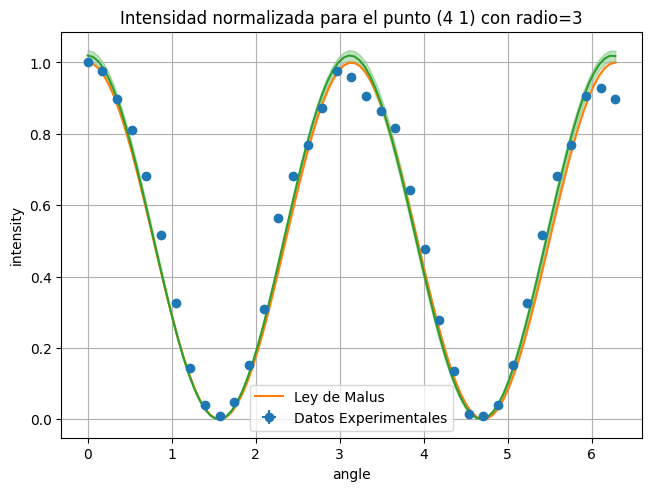

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.06 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


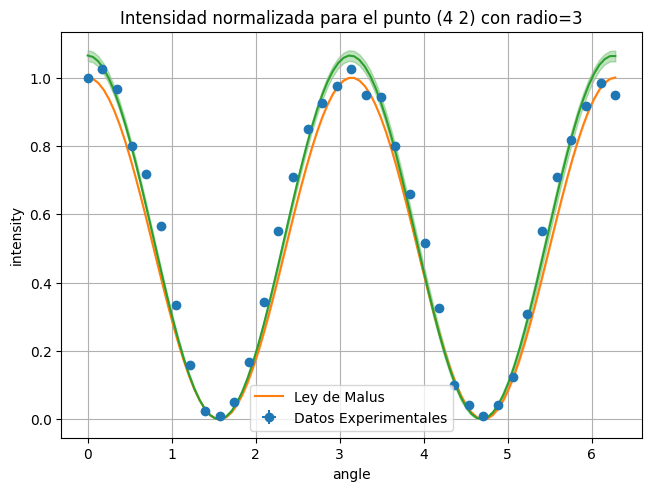

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.08 +/- 0.02,
b = 1.003 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


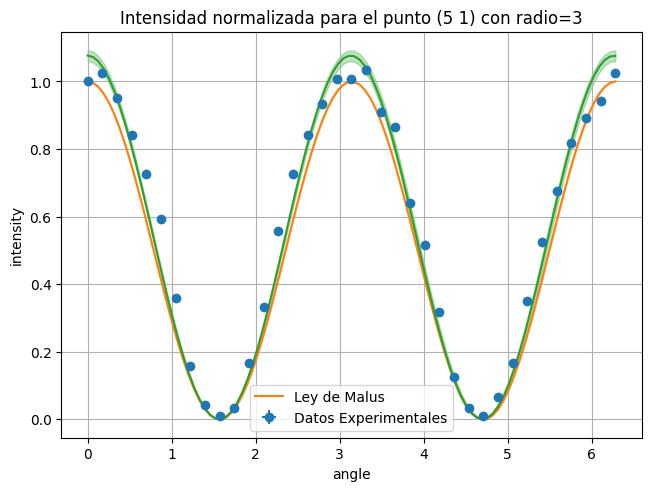

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.02,
b = 1.003 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


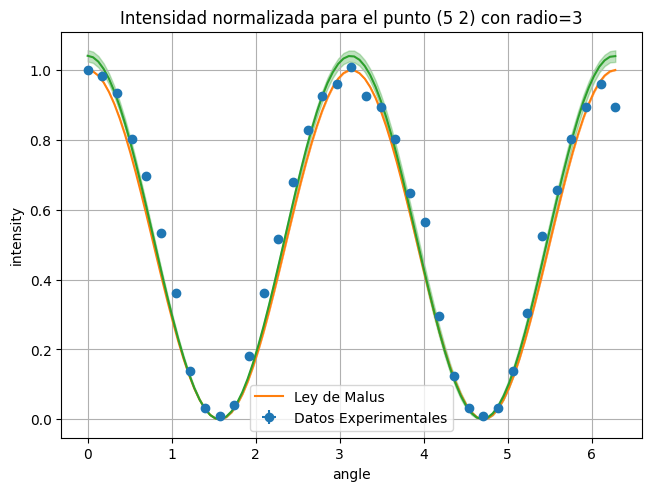

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


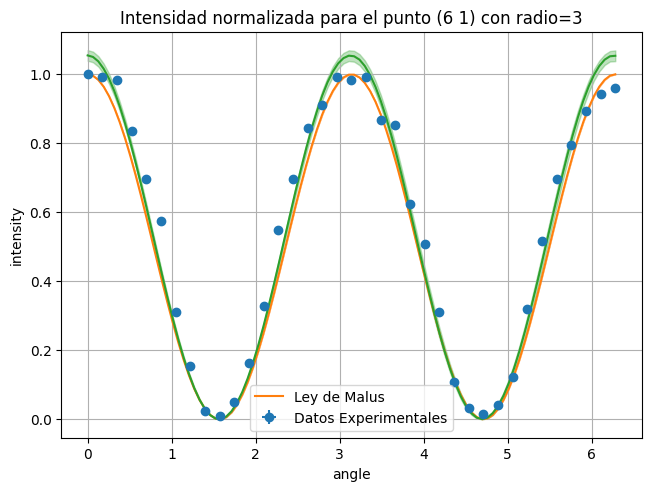

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.02 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


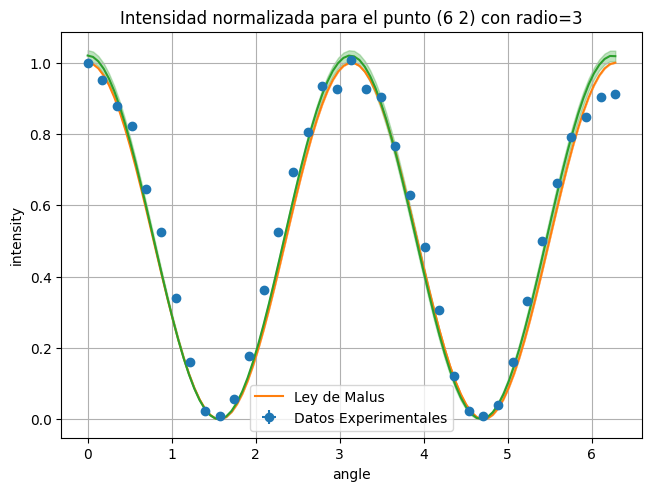

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.07 +/- 0.02,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


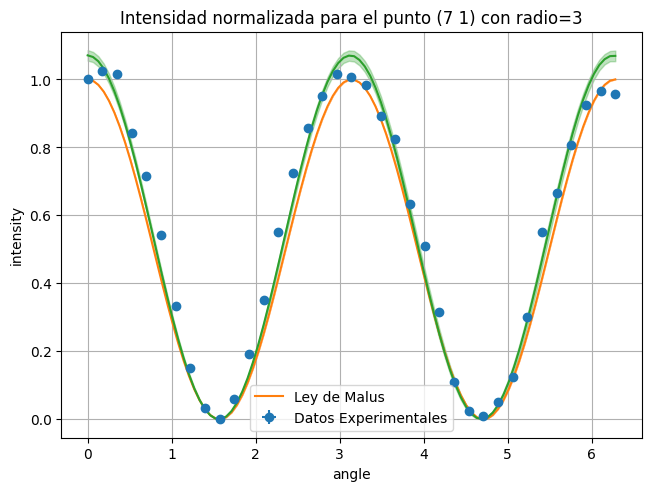

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.01,
b = 1.004 +/- 0.003

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


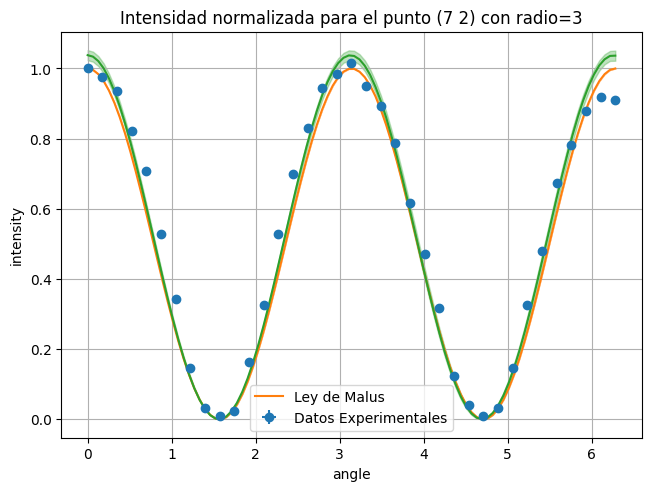

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.07 +/- 0.02,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


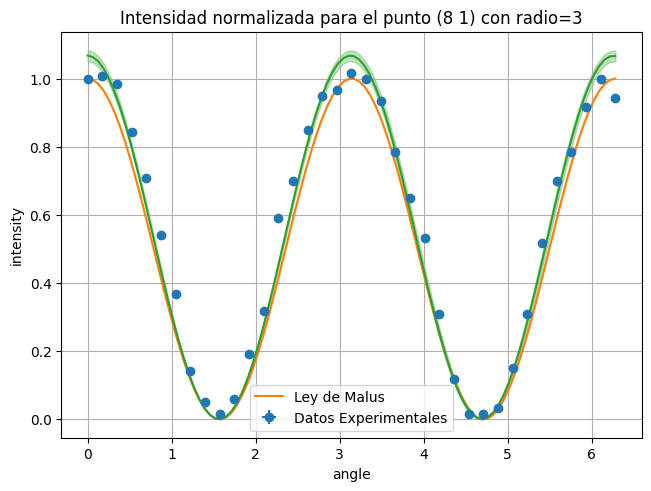

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.05 +/- 0.02,
b = 1.007 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.182]
 [-0.182  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


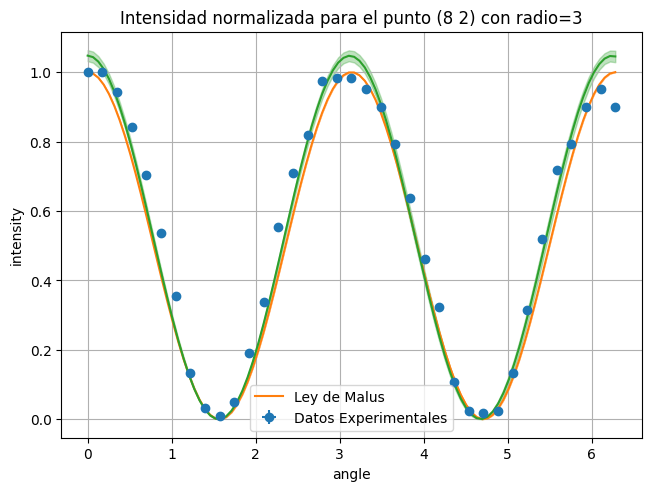

In [144]:
#for every point malus law is plotted
#plot for punctual intensity:
for i in range(len(lista_radios)):
    plot_malus(Intensity,Nx,Ny,i,lista_radios)





----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.01 +/- 0.01,
b = 1.003 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.187]
 [-0.187  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


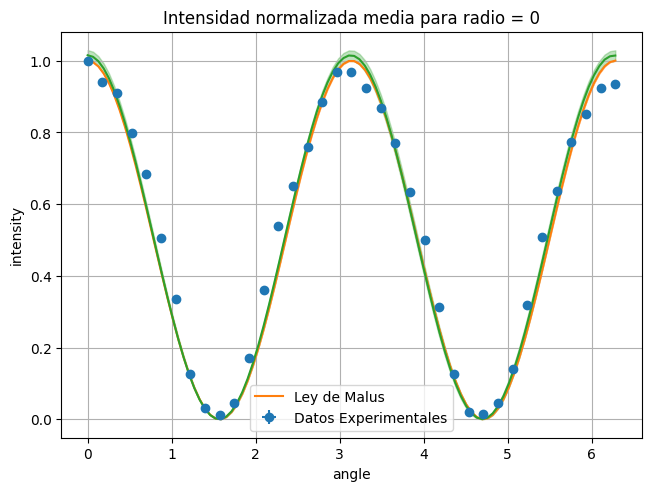

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.01 +/- 0.01,
b = 1.004 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.186]
 [-0.186  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


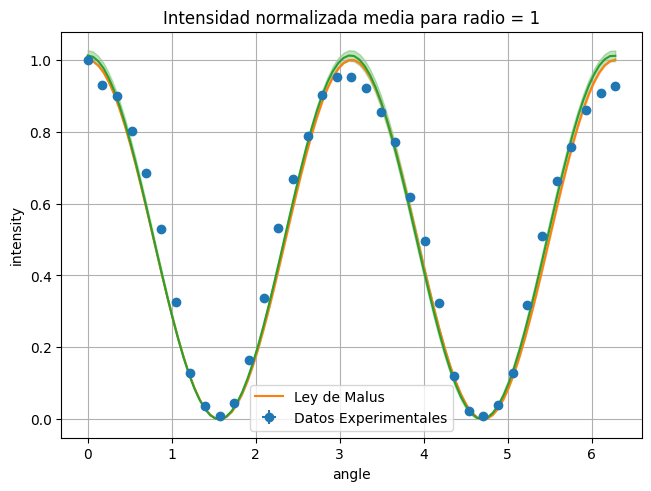

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.01,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.184]
 [-0.184  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


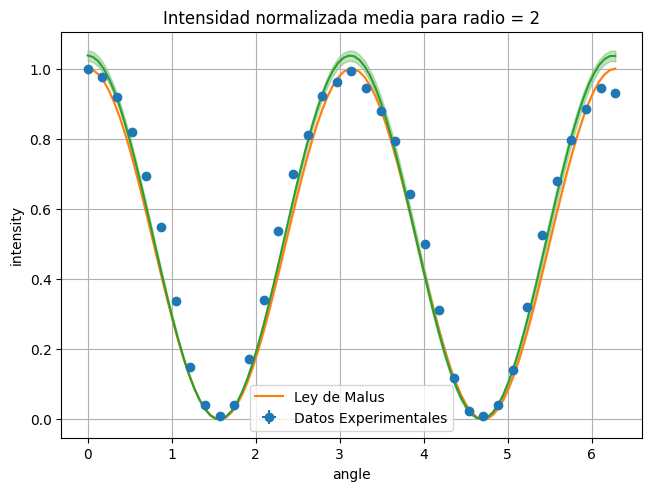

----------------- Fit Results -------------------
Fit of XY Dataset to custom

Result Parameter List: 
a = 1.04 +/- 0.01,
b = 1.005 +/- 0.004

Correlation Matrix: 
[[ 1.    -0.185]
 [-0.185  1.   ]]

chi2/ndof = 0.00/34

--------------- End Fit Results -----------------


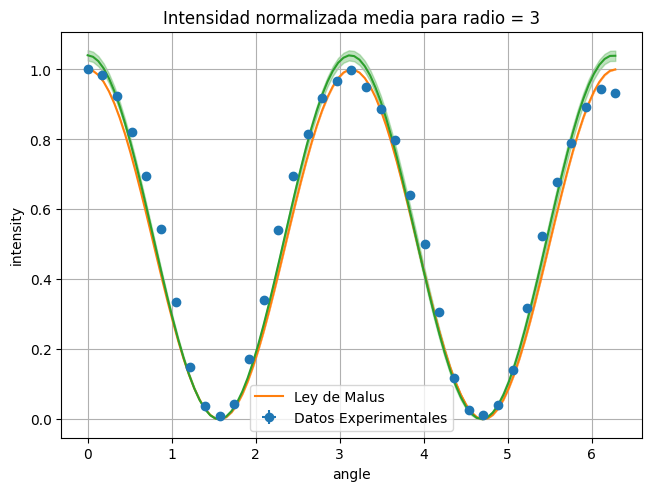

In [146]:
for i in range(len(lista_radios)):
    plot_malus_promedio(Intensity,Nx,Ny,i,lista_radios)

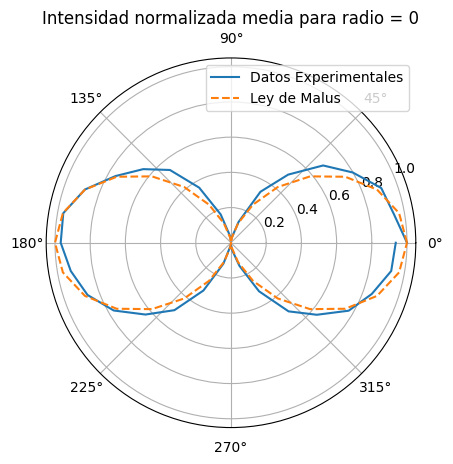

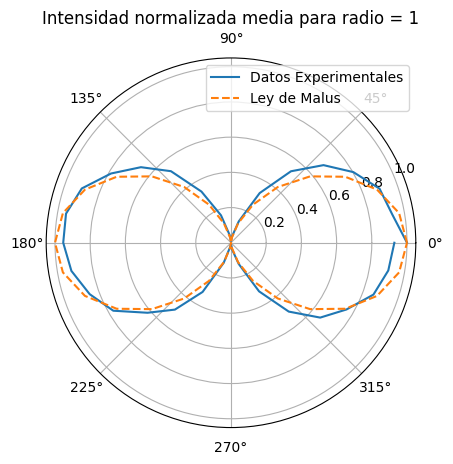

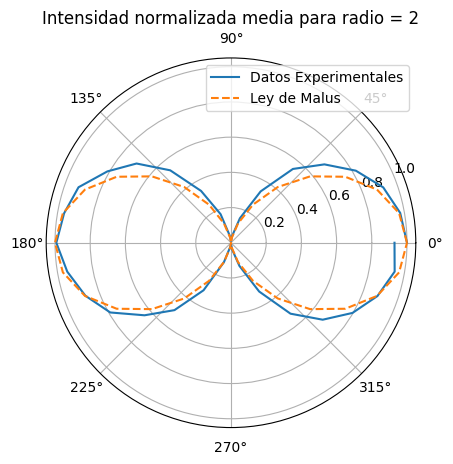

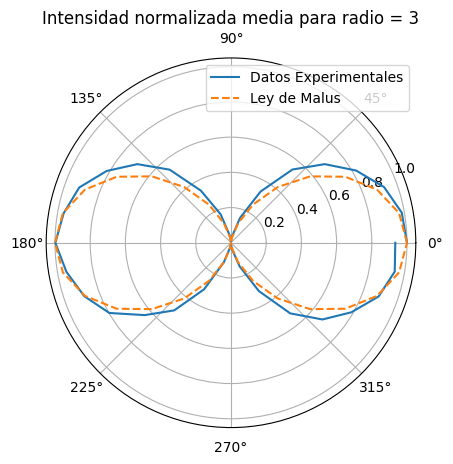

In [171]:
for i in range(len(lista_radios)):
    plot_malus_promedio_polar(Intensity,Nx,Ny,i,lista_radios)

In [166]:
red = np.asarray(pd.read_csv("Red_degree_i_j.csv"))
green = np.asarray(pd.read_csv("Green_degree_i_j.csv"))
blue = np.asarray(pd.read_csv("Blue_degree_i_j.csv"))

print(red[-1,:])
print(red[:,-1])

[0.2902  0.27451 0.27451 0.26667 0.27451 0.27059 0.2549  0.25882 0.26275
 0.25882 0.27451 0.24314 0.26275 0.24706 0.25882 0.27451]
[0.22745   0.19216   0.18039   0.1451    0.082353  0.0039216 0.0039216
 0.        0.0039216 0.        0.0039216 0.047059  0.14118   0.16863
 0.24314   0.24314   0.25882   0.25882   0.23922   0.21176   0.17255
 0.12157   0.07451   0.019608  0.0039216 0.0039216 0.0039216 0.0039216
 0.0078431 0.031373  0.11373   0.20784   0.21176   0.25098   0.25098
 0.27451  ]
